<a href="https://colab.research.google.com/github/ELMehdiNaor/TensorFlow-Developer-Certificate-in-2022-Zero-to-Mastery/blob/main/02_Neural_Networks_classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to create neural networks for classification problems.

A classification is where you try to classify something as one thing or another. 

A few types of classification problems are: 

- Binary classification 

- Multiclass classification 

- Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples: 
n_samples = 1000

# Create circles: 
X, y = make_circles(n_samples, noise=0.03, random_state=42)

# Visualize Features: 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Visualize the labels: 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is a little hard to understand right now... let's visualize it !

In [ ]:
import pandas as pd 

# Create a DataFrame: 
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

# Visualize the DataFrame:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


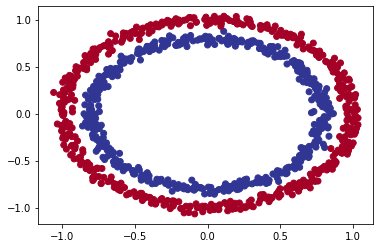

In [ ]:
# Visualize the data as a plot: 
from matplotlib import pyplot as plt 
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu);

🛠: Before pushing forward, spend 10 minutes playing around with **playground.tensorflow.org** building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output Shapes: 


In [ ]:
# Check the shapes of our features and labels: 
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with: 
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of the features and labels: 
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling: 

The steps in moddeling with TensorFlow are typically: 

1- **Create or import a model**

2- **Compile the model**

3- **Fit the model**

4- **Evaluate the model** 

5- **Tweak** 

6- **Evaluate.....**

In [ ]:
# Set the random_seed:
import tensorflow as tf 
tf.random.set_seed(42)

In [ ]:
# 1.Create the model: 
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(1)                    
])

# 2.Compile the model: 
model_1.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ["accuracy"])

# 3.Fit the model: 
history = model_1.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5012


In [ ]:
# Let's try improve our model by training it for longer: 
history = model_1.fit(tf.expand_dims(X, axis=-1), y, epochs = 200, verbose = 0)

Text(0, 0.5, 'losses')

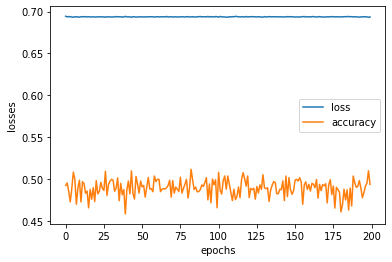

In [ ]:
# Visualize the model's history: 
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("losses")

In [ ]:
# Evaluate the model: 
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934648752212524, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing. So let's step things up a notch and add an extra layer. 

In [ ]:
# Set the random seed:
tf.random.set_seed(42)

# 1.Create the model using the Sequential API:
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(1), 
          tf.keras.layers.Dense(1)                     
])

# 2.Compile the model: 
model_2.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ["accuracy"])

# 3.Fit the model: 
history = model_2.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose = 0)

# 4.Evaluate the model: 
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933176517486572, 0.5]

## Improving our Model 

Let's look into our bag of tricks to see how we can improve our model. 

1-**Create a model**-we might add more layers or increase the number of hidden units within a layer

2-**Compiling a model**-here we might choose a different optimization function such as Adam instead of SGD

3-**Fitting a model**-perhaps we might fit our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed: 
tf.random.set_seed(42)

# 1.Create the model (this time with 3 layers, 2 hidden, 1 output): 
model_3 = tf.keras.Sequential([ 
          tf.keras.layers.Dense(100), 
          tf.keras.layers.Dense(10), 
          tf.keras.layers.Dense(1)                      
])

# 2.Compile the model: 
model_3.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# 3.Fit the model: 
history = model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4.Evaluate the model: 
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [ ]:
# Visualze the model summary: 
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2, 100)            200       
                                                                 
 dense_7 (Dense)             (None, 2, 10)             1010      
                                                                 
 dense_8 (Dense)             (None, 2, 1)              11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a function `plot_prediction_boundary()`, this function will: 

- Take a trained model, features(X) and labels(Y)

- Create a meshgrid of the different X values

- Make predictions accross the meshgrid

- Plot the predictions as well as a line between zones where each unique class falls

In [ ]:
import numpy as np 
def plot_decision_boundary(model, X, y): 
  """ 
  Plots the decision boundary created by a model predicting on X
  """ 
  # Define the axis boundaries of the plot and create a meshgrid: 
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1 
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we are going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions: 
  y_pred = model.predict(x_in)

  # Check for multi-class: 
  if len(y_pred[0]) > 1:    # if greater than 
     print("doing multiclass classification")
     # we have to reshape our predictions to get them ready for plotting: 
     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else: 
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

# Plot the decision boundary: 
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification


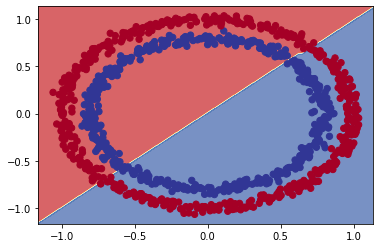

In [ ]:
# Checking out the predictions our model is making: 
plot_decision_boundary(model = model_3, X=X, y=y)

**Note:** Whenever your model is perforing strangely or thre is something going on with your data you are not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions

In [ ]:
# Let's see if our model can be used for a linear regression problem: 
# Set the seed_ 
tf.random.set_seed(42)

# Create some regression data: 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Visualize: 
X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
# Split our regression data into training and test sets: 
# Training Set:
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]
# Testing Set: 
X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

In [ ]:
# Fit out model to the regression data: 
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: -4016.9167 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: -7145.1201 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: -7154.2476 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Oh wait .... we compiled our model for a binary classification problem. But... we are know working on a regression problem, let#s change the model so suit our data.

In [ ]:
# Set up random seed: 
tf.random.set_seed(42)

# 1.Create the model: 
regression_model = tf.keras.Sequential([
                   tf.keras.layers.Dense(100), 
                   tf.keras.layers.Dense(10),
                   tf.keras.layers.Dense(1)                     
])

# 2.Compile the model : 
regression_model.compile(loss=tf.keras.losses.mae, 
                         optimizer = tf.keras.optimizers.Adam(), 
                         metrics=["mae"])

# 3.Fit the model: 
regression_model.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100, verbose = 0)

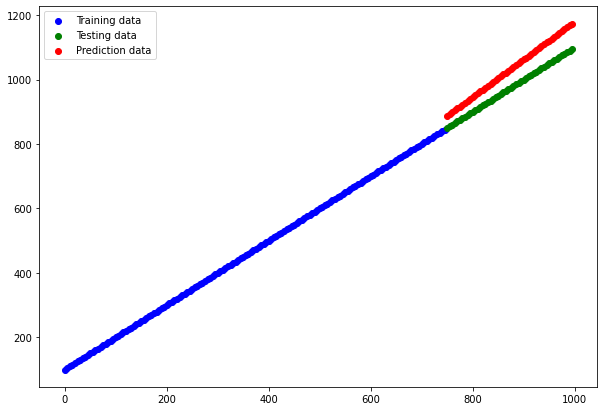

In [ ]:
# Make predictions with our trained model: 
y_reg_preds = regression_model.predict(X_reg_test) 
# Plot the model's predictions against our regression data: 
plt.figure(figsize=(10,7))
# Plot the training data in blue: 
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
# Plot the testing data in green: 
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
# Plot the predictions in red: 
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction data")
# Display legend: 
plt.legend()

## The missing peace: Non-linearity 

-**Linear data:** possible to model with straight lines 

-**Non-Linear data:** impossible to model with straight lines

In [ ]:
# Set the random seed: 
tf.random.set_seed(42)

# 1.Create the model: 
model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                     
])

# 2.Compile the model: 
model_4.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(lr=0.001), 
                metrics = ["accuracy"])

# 3.Fit the model: 
history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.2732 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1783 - accuracy: 0.4965
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1319 - accuracy: 0.4972
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0867 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0225 - accuracy: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9695 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9023 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8551 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7407 - accuracy: 0.5006
Epoch 11/100
32/32 [=

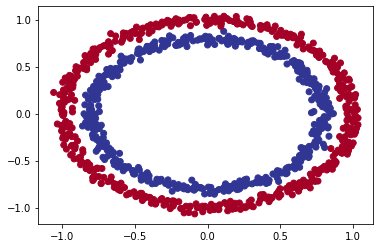

In [ ]:
# Let#s remind ourserlf of what the data looks like: 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing multiclass classification


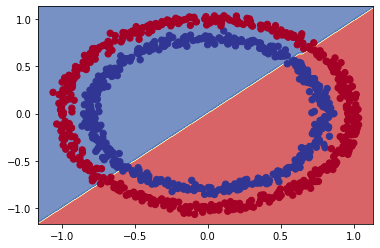

In [ ]:
# Check the decision boundary for our latest model: 
plot_decision_boundary(model = model_4, X=X, y=y)

**Note:** Let's try to build our first neural network with a non-linear activation function.

In [ ]:
# Set random seed:
import tensorflow as tf 
tf.random.set_seed(42)

# 1. Create a model with non-linear activation function: 
model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
])

# 2. Compile the model: 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = ["accuracy"])

# 3. Fit the model:
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs = 100, verbose = 0)

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground 
# Set the random seed: 
tf.random.set_seed(42)

# 1. Create the model: 
model_6 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation ="relu"), 
          tf.keras.layers.Dense(4, activation="relu"), 
          tf.keras.layers.Dense(1) # output layer                  
])

# 2. Compile the model: 
model_6.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=["accuracy"])

# 3. Fit the model: 
history = model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# 4.evaluate the model: 
model_6.evaluate(X ,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing multiclass classification


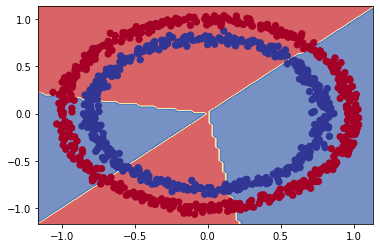

In [ ]:
# Check out the prediction using 3 hidden layers: 
plot_decision_boundary(model=model_6, X=X, y=y)

This time we will change the activation function on our output layer too. For binary classification, the output layer activation is usually the **Sigmoid activation function**

In [ ]:
# Set random seed: 
tf.random.set_seed(42)

#1. Create a model: 
model_7 = tf.keras.Sequential([
           tf.keras.layers.Dense(4, activation="relu"), 
           tf.keras.layers.Dense(4, activation="relu"), 
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(1, "sigmoid")                     
])

#2. Compile the model: 
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

#3. Fit the model: 
history = model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=150, verbose=0)

In [ ]:
#4. Evaluate our model: 
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 1.0000


[0.0821005254983902, 1.0]

Woah! it looks like our model is getting some incredible results, let's check them out.

doing binary classification


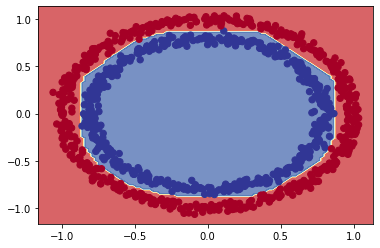

In [ ]:
# View the prediction of the model with relu and sigmoid activation function: 
plot_decision_boundary(model = model_7, X=X, y=y)

Nice! it looks like our model is perfectly separating the two circles

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered. 

**Note:** the combination of **linear(straight lines) and non-linear(non-straight lines) functions** is one of the key fundamentals of neural networks

In [ ]:
# Create a toy tensor (similar to the data we pass into our models): 
A = tf.cast(tf.range(-10,10), tf.float32)
len(A), A.shape, A.dtype, A.ndim

(20, TensorShape([20]), tf.float32, 1)

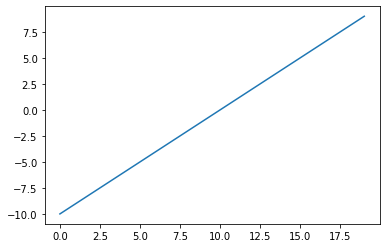

In [ ]:
# Visualize our toy tensor: 
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/1+exp(-x): 
def sigmoid(x): 
  return (1/(1+tf.exp(-x)))

# Use the sigmoid function on our toy tensor: 
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

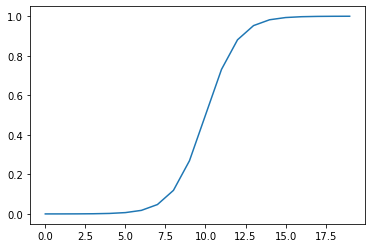

In [ ]:
# Plot our toy tensor transformed by sigmoid: 
plt.plot(sigmoid(A))

In [ ]:
# Let's create the relu function: 
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function: 
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

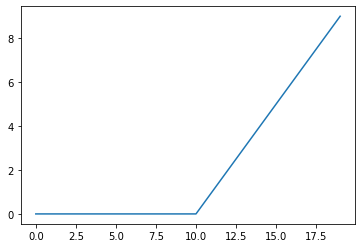

In [ ]:
# Plot Relu-modified tensor: 
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function: 
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

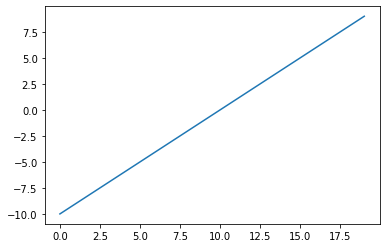

In [ ]:
# Does the linear activation function change anything: 
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change? 
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification 

So far we've been training and testing on the same datatset ... However, in machine learning this is basically a sin. 

So let's create a traning and test set.

In [ ]:
# Check/Show how many samples we have: 
len(X)

1000

In [ ]:

# Split the data into Training set and Testing set using Indexing:
X_train, y_train = X[:700], y[:700]
X_test, y_test = X[700:], y[700:]
len(X_train), len(X_test), len(y_train), len(y_test), X_train.shape, X_test.shape, y_train.shape, y_test.shape

(700, 300, 700, 300, (700, 2), (300, 2), (700,), (300,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data: 
# Set random seed: 
tf.random.set_seed(42)

#1. Create the model (same as model_7): 
model_8 =  tf.keras.Sequential([
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(4, activation="relu"), 
           tf.keras.layers.Dense(4, activation="relu"), 
           tf.keras.layers.Dense(1, activation="sigmoid") 
])

#2. Compile the model: 
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(0.01), 
                metrics=["accuracy"])

#3. Fit the model: 
history_8 = model_8.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=25) 

Epoch 1/25
22/22 [==============================] - 1s 2ms/step - loss: 0.6839 - accuracy: 0.5357
Epoch 2/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5386
Epoch 3/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5443
Epoch 4/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5700
Epoch 5/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.5614
Epoch 6/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.5786
Epoch 7/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.5800
Epoch 8/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.5943
Epoch 9/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6429
Epoch 10/25
22/22 [==============================] - 0s 2ms/step - loss: 0.6087 - accuracy: 0.6971
Epoch 11/25
22/22 [

In [ ]:
# Model Summary: 
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_20 (Dense)            (None, 4)                 12        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


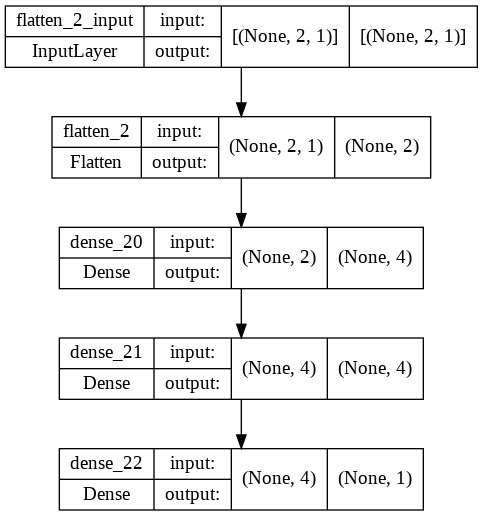

In [ ]:
# Plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=model_8, show_shapes = True)

In [ ]:
#4. evaluate the model:
model_8.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9833


[0.10764271765947342, 0.9833333492279053]

doing binary classification
doing binary classification


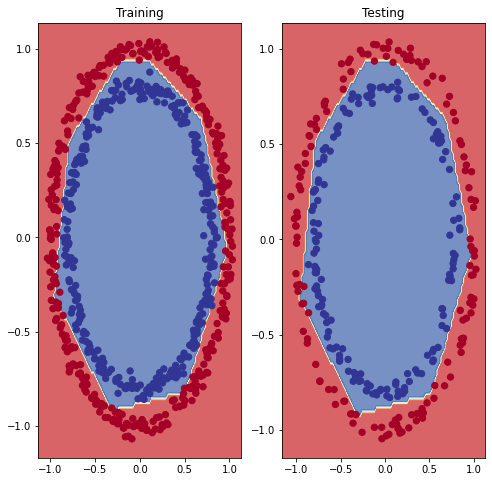

In [ ]:
# Plot the decision boundaries for the training and test sets: 
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot loss (or training) curves

In [ ]:
# Convert the history object into a Dataframe: 
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.683870,0.535714
1,0.677345,0.538571
2,0.673308,0.544286
3,0.669946,0.570000
4,0.664096,0.561429
5,0.658842,0.578571
6,0.652243,0.580000
7,0.642634,0.594286
8,0.627164,0.642857
9,0.608683,0.697143


Text(0.5, 1.0, 'Model_8 loss curves')

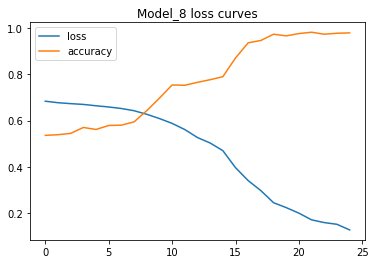

In [ ]:
# Plot the loss curves: 
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it is making are getting closer to the ground trouth labels)

## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps: 

- A learning rate **callback**: you can think of a callback as an extra piece of functionality, you can add to your neural network while it is training 

- Anotther model (we could use the same one as above, but we are practicing building models here)

- A modified loss curves plot

In [ ]:
# Set random seed: 
tf.random.set_seed(42)

#1. Create a model (same as model_8): 
model_9 = tf.keras.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"), 
          tf.keras.layers.Dense(1,activation="sigmoid")                     
])

#2. Compile the model: 
model_9.compile(loss="binary_crossentropy", 
                optimizer="Adam", 
                metrics=["accuracy"])

#3. Create a learning rate callback: 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10*(epoch/20))

#4. Fit the model:
history_9 = model_9.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
22/22 [==============================] - 1s 18ms/step - loss: 0.6898 - accuracy: 0.5129 - lr: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5129 - lr: 5.0000e-05
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5114 - lr: 1.0000e-04
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5114 - lr: 1.5000e-04
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5100 - lr: 2.0000e-04
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5157 - lr: 2.5000e-04
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5143 - lr: 3.0000e-04
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5071 - lr: 3.5000e-04
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss

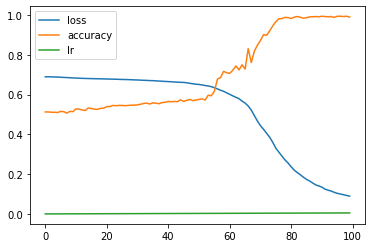

In [ ]:
# Checkout the history: 
pd.DataFrame(history_9.history).plot()

In [ ]:
# Plot the learning rate versus the loss: 
lrs = 1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs. Loss')

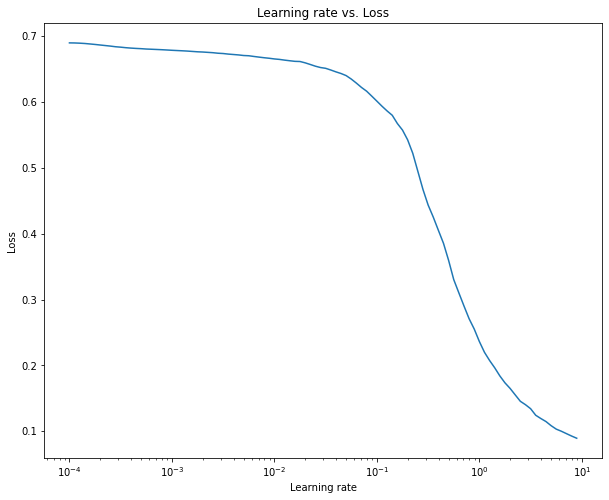

In [ ]:
plt.figure(figsize=(10,8))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
# Let us try using a higher learning rate with the same model as before: 
import tensorflow as tf
# set random seed: 
tf.random.set_seed(42)

#1. Create the model: 
model_10 = tf.keras.Sequential([
           tf.keras.layers.Flatten(), 
           tf.keras.layers.Dense(4,activation="relu"),
           tf.keras.layers.Dense(4,activation="relu"),
           tf.keras.layers.Dense(1,activation="sigmoid")                     
])

#2. Compile the model: 
model_10.compile(loss="binary_crossentropy", 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), 
                 metrics=["accuracy"])

#3. Fit the model: 
history_10 = model_10.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 2ms/step - loss: 0.6812 - accuracy: 0.5714
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6129
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6986
Epoch 4/20
22/22 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7200
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7800
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8086
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8214
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8543
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8457
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8886
Epoch 11/20
22/22 [

In [ ]:
#Evaluate model 10 on the test dataset: 
model_10.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9833


[0.062016602605581284, 0.9833333492279053]

In [ ]:
# Eveluate model 9 on the test dataset: 
model_9.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9933


[0.06654706597328186, 0.9933333396911621]

doing binary classification
doing binary classification


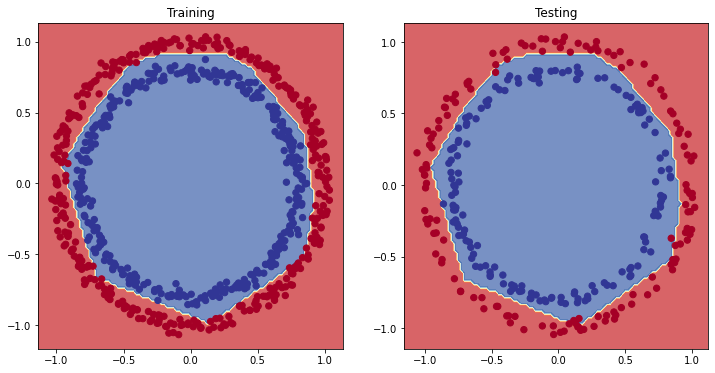

In [ ]:
# Plot the decision boundaries for the traning und test sets: 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

How about a confusion matrix ?

In [ ]:
# Create a confusion matrix: 
from sklearn.metrics import confusion_matrix 
# Make predictions: 
y_preds = model_10.predict(X_test)
# Visualize Visualize Visualize:
len(y_test), len(y_preds), y_test.shape, y_preds.shape

(300, 300, (300,), (300, 1))

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
y_preds

array([[9.94258642e-01],
       [9.99316931e-01],
       [9.93916631e-01],
       [8.85540366e-01],
       [9.98821497e-01],
       [7.78585672e-04],
       [9.16361809e-04],
       [6.65286183e-03],
       [9.98205304e-01],
       [9.94558573e-01],
       [9.98136580e-01],
       [9.99692500e-01],
       [3.38353821e-05],
       [2.99633294e-01],
       [1.01953447e-02],
       [8.92132521e-04],
       [5.55351289e-06],
       [9.96884406e-01],
       [9.98171210e-01],
       [5.70622087e-03],
       [9.98659670e-01],
       [1.33831172e-05],
       [9.97837186e-01],
       [1.24347210e-03],
       [1.33728981e-03],
       [1.09486878e-02],
       [1.79350376e-04],
       [6.51597977e-04],
       [1.38679547e-06],
       [3.82044911e-03],
       [3.80555689e-02],
       [2.01411545e-02],
       [9.96012568e-01],
       [9.88961458e-01],
       [9.98755336e-01],
       [9.94343400e-01],
       [9.98849511e-01],
       [1.36111677e-02],
       [9.99442339e-01],
       [1.68255806e-01],


In [ ]:
# Create a confusion matrix: 
confusion_matrix(y_true, y_preds)

NameError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
y_preds[:10]

array([[9.9425864e-01],
       [9.9931693e-01],
       [9.9391663e-01],
       [8.8554037e-01],
       [9.9882150e-01],
       [7.7858567e-04],
       [9.1636181e-04],
       [6.6528618e-03],
       [9.9820530e-01],
       [9.9455857e-01]], dtype=float32)

Oops..... looks like our predictions array has come out in **predictiob probability** form.... the standard output from the sigmoid(or softmax) activation functions. 

In [ ]:
# Convert prediction probabilities to binary format and view the first 10: 
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
# create a confusion matrix: 
confusion_matrix(y_test, tf.round(y_preds))

array([[136,   5],
       [  0, 159]])

How about we prettify our confusion matrix?

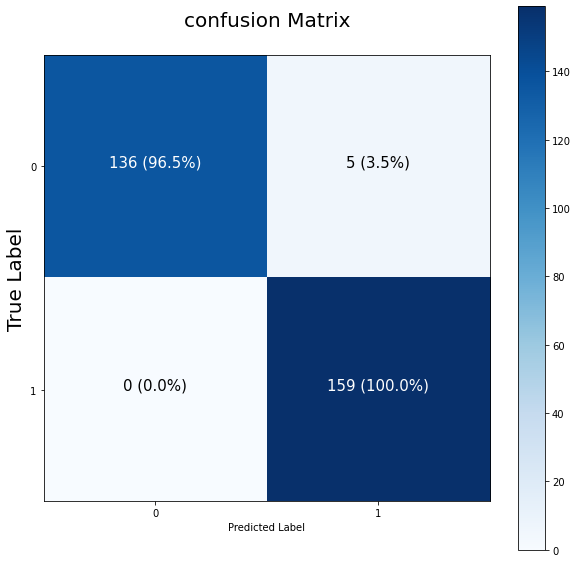

In [ ]:
import itertools

figsize = (10,10)
# Create the confusion Matrix: 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix 
n_classes = cm.shape[0]
# Let's prettify it: 
fig, ax = plt.subplots(figsize = figsize)
# Create a matrix plot: 
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)
# Create classes:
classes = False 
if classes:
  labels = classes
else: 
  labels = np.arange(cm.shape[0])

# Label the axes: 
ax.set(title= "confusion Matrix",
       xlabel= "Predicted Label",
       ylabel= "True Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes), 
       xticklabels = labels, 
       yticklabels = labels)

# Set x-axis labels to botton: 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size: 
ax.yaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors: 
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That looks much better. It seems our model has made almost perfect predictions on the test set except for two false positives (top right corner).

# Working with a larger example (multiclass classification) 

When you have more than two classes as an option, it's known as multi-class classification. 

  - This mean if you have 3 different classes, it's multi-class classification
  - It also means if you have 100 different classes, it's multi-class classification 

To practice multi-class classification, we are going to build a neural network to classify images of different items

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the `tf.keras.datasets` module.

**Ressource:** The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 

# The data had already been sorted into training and test sets for us:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Now let's check out an example

In [ ]:
# Show the first training example: 
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Woah, we get a large list of numbers, followed (the data) by a single number (the classe label). 

What about the shapes?

In [ ]:
#Check the shapes of our data: 
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#Check the shape of a single sample: 
train_data[1].shape, train_labels[1].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28,28) and a label each as well as 10,000 test examples of shape (28,28). 

But these are just numbers, let's visualize !

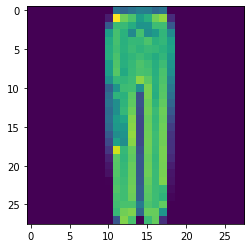

In [ ]:
#plot a single sample: 
from matplotlib import pyplot as plt 
plt.imshow(train_data[1000]);

Hmm, but what about its label?

In [ ]:
# Check out samples label 
train_labels[1000]

1

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form 

Let's create a small list of the class names 

  **Note:**While this dataset has been prepared for us and ready to go, it's important to remember many datatsets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

# How many classes are thre (will this be our output shape)?
len(class_names)

10

Now we have these, let's plot another example. 

  **Question:** Pay particular attention to what the data we are working on will look like. Is it only straight lines? Or does it have non-straight lines as well? Do you think if we wanted to find patterns in the photos of clothes (which are actually collections of pixels), will our model need non-linearities (non-straight lines) or not?

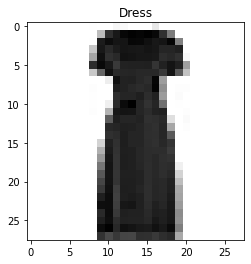

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[50], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[50]]);

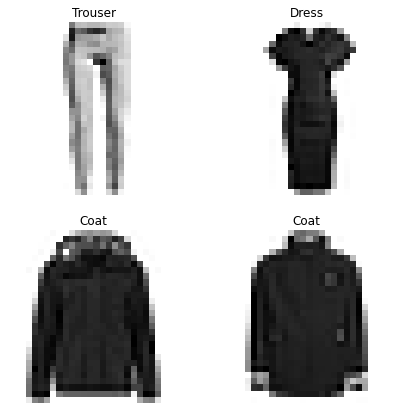

In [ ]:
# Plot multiple random images of fashion MNIST
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright let's build a model to figure out the relationship between the pixel values and their labels. 

Since this is a multiclass classification problem, we will need to make a few changes to our architecture: 

  - The **input shape** will have to deal with is a 28x28 tensor(the height and width of our images). 
    - We are actually going to squash the input vector into a tensor (vector) of shape (784)
  - The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
    - We will also change the `activation` parameter of our output layer to be "`softmax`" instead of "`sigmoid`". As we will see the "`softmax`" activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to -1. The index with the highest value is predicted by the model to be the most likely class).
  - We will need to change our loss function from a binary loss function to a multiclass loss function. 
    - More specifically, since our labels are in integer form, we will use 
 `tf.keras.losses.SparseCategoricalCrossEntropy()`, if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we would use 
 `tf.keras.losses.CategoricalCrossentropy()`.

- We will also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training. 


You ready? Let's go.

In [ ]:
# Set the random seed: 
tf.random.set_seed(42)

# 1.Create the model: 
model_11 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4, activation="relu", name="layer_1"),
           tf.keras.layers.Dense(4, activation="relu", name="layer_2"),
           tf.keras.layers.Dense(10, activation="softmax", name="output_layer")                     
])

# 2.Compile the model: 
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# 3.Fit the model: 
non_norm_history = model_11.fit(tf.expand_dims(train_data, axis=-1), 
            train_labels, 
             epochs = 10,
             validation_data=(test_data, test_labels)) # see how the model performs on test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Check the shapes of our model 
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 4)                 3140      
                                                                 
 layer_2 (Dense)             (None, 4)                 20        
                                                                 
 output_layer (Dense)        (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Alright our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classfication problem. 

Which is better than guessing (guessing with 10 classes would result in about ~10% accuracy) but we can do better. 

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `non_norm_history` variable calling `fit()`. It's pixel values are between 0 and 255. 

Let's see....

In [ ]:
# Check the min and max values of the training data: 
train_data.min(), train_data.max()

(0, 255)

We can these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float). 

Doing so will result in all or four data being between 0 and 1 (known as **scalling** or **normalization**).

In [ ]:
# Divide train and test images by the maximum value (normalize it)
train_data_norm = train_data / 255.0 
test_data_norm = test_data / 255.0 

# Check the min and max values of the training data: 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

Beautiful Now our data is between 0 and 1. Let's see what happens when we model it.

We will use the same model as before (`model_11`) except this time the data will be normalized.

In [ ]:
# Set random seed: 
tf.random.set_seed(42)

# 1. Create the model: 
model_12 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4, activation="relu", name="layer_1"),
           tf.keras.layers.Dense(4, activation="relu", name="layer_2"),
           tf.keras.layers.Dense(10, activation="softmax", name="output_layer")                     
])

# 2. Compile the model: 
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model: 
norm_history = model_12.fit(tf.expand_dims(train_data_norm, axis=-1), 
                            train_labels,
                            epochs=10, 
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Woah we used the exact same model as before but with normalized data we are now seeing a much higher accuracy value ! 


Let's ploat each model's history (their loss curves)

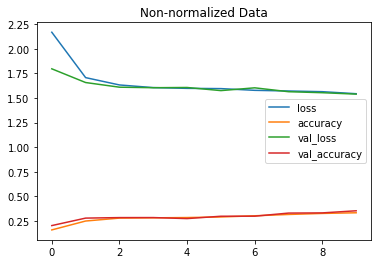

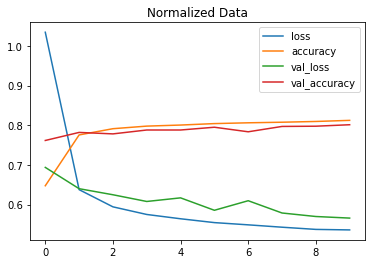

In [ ]:
import pandas as pd 
# Plot non-normalized data loss curves: 
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves:
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

Wow ! From these two plots, we can see how much quicker our model with the normalized data (`model_12`) improved than the model with non-normalized data (`model_11`).

**Note:** The same model with even slightly different data can produce dramatically different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture). 

How about we find the ideal learning rate and see what happends? 

We will use the same architecture we have been using.

In [ ]:
# Set random seed: 
tf.random.set_seed(42)

# 1.Create the model: 
model_13 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)),
           tf.keras.layers.Dense(4, activation="relu", name="layer_1"),
           tf.keras.layers.Dense(4, activation="relu", name="layer_2"),
           tf.keras.layers.Dense(10, activation="softmax", name="output_layer")                     
])

# 2.Compile the model:
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3.Create the learning rate callback: 
lr_scheduler_2 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4.Fit the model: 
find_lr_history = model_13.fit(tf.expand_dims(train_data_norm, axis=-1),train_labels,
                              epochs = 40, # model already doing pretty good with current LR, probably don't need 100 epochs
                              validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler_2])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

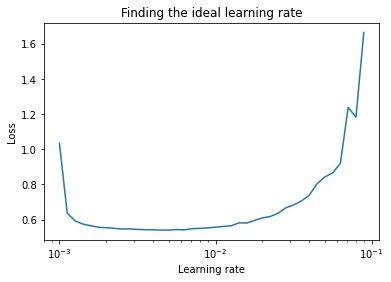

In [ ]:
# Plot the learning rate decay curve
import numpy as np 
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model 
model_14 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784)
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(4, activation="relu"),
           tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# 2.Compile the model 
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default) 
             metrics=["accuracy"])

# 3.Fit the model 
model_14_history = model_14.fit(tf.expand_dims(train_data_norm, axis=-1),
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Now we have got a model trained with a close-to-ideal learning rate and performing pretty well, we have got a couple of options. 

We could: 
  - Evaluate its performance using other classification metrics(such as **confusion matrix** or **classification report**).
  - Assess some of its predictions (through visualizations).
  - Improve it's accuracy (by training it for longer or changing the architecture)
  - Save and export it for use in an application. 

  Let's go through the first two options. 

  First we will create a classification matrix to visualize its predictions across the different classes.

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Since a confusion matrix compares the truth labels(`test_labels`) to the predicted labels, we have to make some predictions with our model.

In [ ]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) #"probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

Our model outputs a lift of **prediction probabilities** meaning, it outputs a number of how likely it thinks a particular class is to be the label. 

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class. 

To find the highest value we can use the `argmax()` method.

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
# See the predicted class number and label for the second example
y_probs[1].argmax(), class_names[y_probs[1].argmax()]

(2, 'Pullover')

Now let's do the same for all the predictions

In [ ]:
# Convert all of the predictions from probabilities to labels: 
y_preds = y_probs.argmax(axis=1)

# View the first 10_prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 8, 7])

Wonderful, now we have got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [ ]:
# Check out the non-prettified confusion matrix: 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[565,   5,  20,  88,  49,   0, 256,   0,  17,   0],
       [  2, 934,   1,  30,  25,   0,   7,   0,   1,   0],
       [  7,   1, 429,   8, 462,   0,  65,   0,  27,   1],
       [ 14,  10,   6, 714, 179,   0,  23,   0,  53,   1],
       [  0,   0,  19,   4, 953,   0,  11,   0,  10,   3],
       [  0,   0,   1,   0,   1, 161,   0,  69, 108, 660],
       [ 62,   1,  86,  39, 516,   0, 262,   0,  34,   0],
       [  0,   0,   0,   0,   0,   0,   0, 765,   3, 232],
       [  2,   0,  12,  12,  31,   0,   3,   3, 919,  18],
       [  0,   0,   1,   0,   1,   0,   0,  10,   0, 988]])

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.



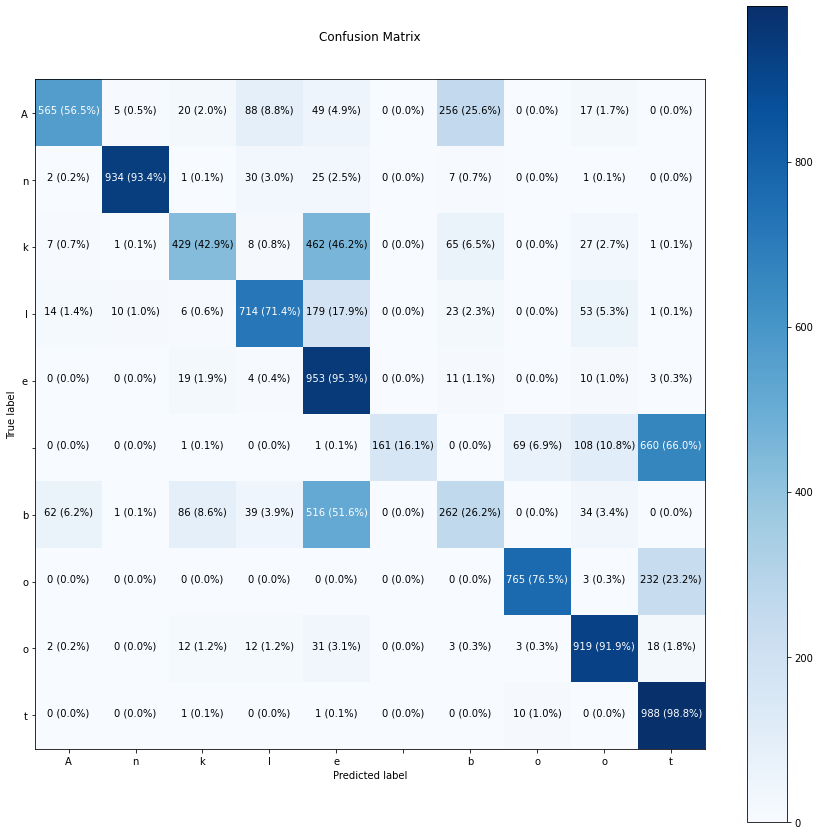

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

🤔**Question**: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

🔑**Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

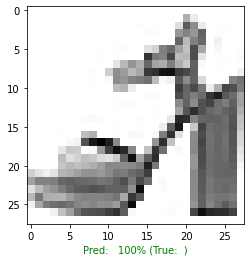

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

## What patterns is our model learning?

We have been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like? 

Let's crack open one of our models and find out. 

First, we will get a list of layers in our most recent model (`model_14`) using the `layers` attribute.

In [ ]:
# Find the layers of our most recent model 
model_14.layers

We can access a target layer using indexing.

In [ ]:
# Extract a particular layer (layer_1)
model_14.layers[1]

And we can find the patterns learned by a particular layer using the `get_weights` method.

The `get_weights()` method returns the **weights**(also known as a weights martix) and biases(also known as a bias vector) of a particular layer.

In [ ]:
# Get the patterns of a layer in our network:
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

The weight matrix has the shame shape as the input data, which in our case is 784(28x28 pixels). And there is a copy of
the weights matrix for each neuron in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions. 

These values start out as a random numbers(they are set by the `kernel_initializer` parameter when creating a layer, the default is "`glorot_uniform`" and are then updated to better representative values of the data(non-random)by the neural network during training.

Now let's check out the bias vector.

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

In [ ]:
Every neuron has a bias vector. Each of these is paired with a weight matrix. 

The bias values get initialized as zeroes by default (using the `bias_initializer` parameter).

The bias vector dictates how much the patterns withing the corresponding weights matrix should influence the next layer.

In [ ]:
# Can now calculate the number of parameters in our model:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now we have built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs
not only relates to a model as a whole but to every layer within a model.

You might have already guesses this, but starting from the input layer, each subsequent layers' input iy the output
of the previous layer. 

We can see this clearly using the utility `plot_model()`

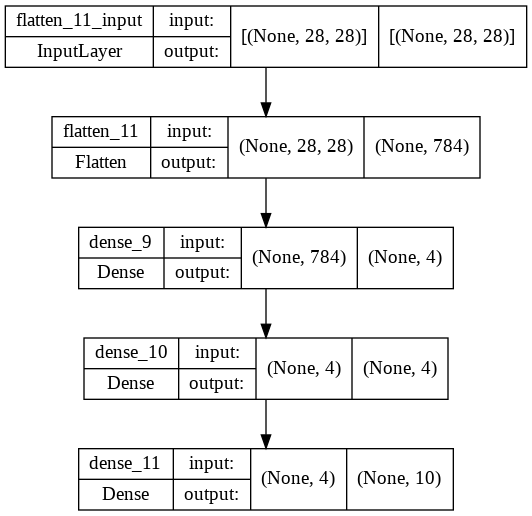

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## How a model learns (in brief)

Alright, we have trained a bunch of models, but we have never really discussed what is going on under the hood. So how exactly does a model learn? 

A model learns by updating and improving its weight matrices and biases values every epoch(in our case, when we call the ``fit()` function). 

It does so by comparing the patterns its learned between the data and labels to the actual labels. 

If the current patterns (weight matrices and bias values) don't result in a desirable decreases in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference). 

This process of using the real labels as a reference to improve the model's predictions is called **backpropagation**

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weights matrices and bias values to better represent the data. 
